In [1]:
!pip install pytesseract

In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,842 kB/s)
debconf: unable to initi

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from google.colab import drive
import pytesseract 

In [ ]:
#drive.mount('/content/drive')

In [4]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [5]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgpm2:amd64.
(Reading database ... 155681 files and directories currently installed.)
Preparing to unpack .../libgpm2_1.20.7-5_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.7-5) ...
Selecting previously unselected package w3m.
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up libgpm2:amd64 (1.20.7-5) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/

In [6]:
model = load_model('/content/drive/MyDrive/ML Capstone Bangkit/ocr_model/bounding_box_segmentation_2.h5')

JELTY JEINE KORDAK

PEREMPUAN



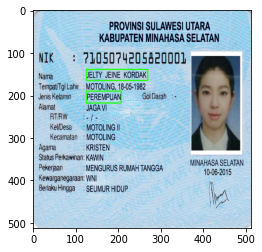

In [32]:
#Prediction.
file_test='/content/dc2ebiz-7b0ed39b-8d2e-4551-88bc-7d1f92fd8de5.png'
img=cv2.imread(file_test,0)
ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
img=cv2.resize(img,(512,512))
img=np.expand_dims(img,axis=-1)
#img = np.stack((img,)*3, axis=-1)
img=img/255

img=np.expand_dims(img,axis=0)
pred=model.predict(img)
pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)
plt.imshow(pred,cmap='gray')
plt.imsave('test_img_mask.png',pred)


img = cv2.imread('/test_img_mask.png',0) 
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,img)
ori_img = cv2.imread(file_test)
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
ori_img = cv2.resize(ori_img, (512,512))

roi_img = []

roi_number = 0
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key = lambda x: cv2.boundingRect(x)[0] + cv2.boundingRect(x)[1] * img.shape[1])
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w > 50:
    # draw a white rectangle to visualize the bounding rect
      cv2.rectangle(ori_img, (x, y), (x + w, y + h), (36,255,12), 2)
      ROI = ori_img[y:y+h, x:x+w]
      roi_img.append(ROI)
      # cv2.imwrite('/content/test_{}.png'.format(roi_number), ROI)
      roi_number += 1
      text = pytesseract.image_to_string(ROI, lang ='eng', config='--psm 7')
      print(text)

    #coordinates.append([x,y,(x+w),(y+h)])

#cv2.drawContours(img, contours, -1, (255, 255, 0), 1)

plt.imshow(ori_img)
plt.show()

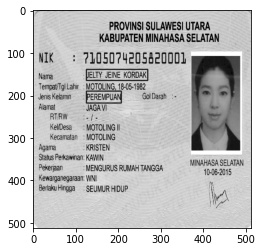

In [25]:
image = cv2.imread("/content/output2.png")
plt.imshow(image)

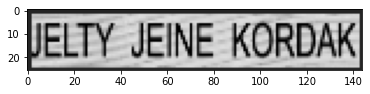

JELTY JEINE KORDAK'



In [26]:
img1 = cv2.imread("/content/test_0.png")  # charge le fichier dans une matrice de pixels couleur
plt.imshow(img1)
plt.show()
text = pytesseract.image_to_string(img1, lang ='eng', config='--psm 7')
print(text)

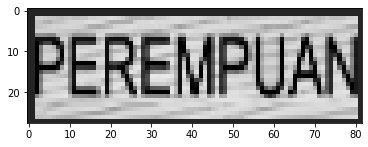

PEREMPUA



In [27]:
img2 = cv2.imread("/content/test_1.png")  # charge le fichier dans une matrice de pixels couleur
plt.imshow(img2)
plt.show()
text = pytesseract.image_to_string(img2, lang ='eng', config='--psm 7')
print(text)